# Bivariate: Categorical vs Time

In [2]:
require(tidyverse)
require(repr)

In [4]:
health <- read_csv("Datasets/mental_health.csv")

In [5]:
#figure dimensions
options(repr.plot.width=20, repr.plot.height=8)

In [6]:
health %>% mutate(Gender = case_when(
    tolower(Gender) %in% c('f', 'female', 'woman') | str_detect(tolower(Gender), 'fem') | str_detect(tolower(Gender), 'wom') ~ 'Female',
    tolower(Gender) %in% c('m', 'male', 'man', 'cis male', 'cis man', 'androgyne', 
                           'mail', 'maile', 'male (cis)', 'male-ish', 'make', 
                           'malr', 'something kinda male?', 'ostensibly male, unsure what that really means', 
                          'male leaning androgynous', 'guy (-ish) ^_^', 'msle', 'mal')  ~ 'Male',
    .default = 'Unknown'
)) -> health

In [7]:
health %>% 
    select(Timestamp, Age, Gender, Country) %>%
    mutate(Year = year(ymd_hms(Timestamp))) %>% 
    mutate(Month = month(ymd_hms(Timestamp))) %>% 
    mutate(Period = ym(paste0(Year, '/', Month))) %>% 
    arrange(Period) %>% 
    mutate(Age_Category = case_when(Age %in% 0:17 ~ 'Child', Age %in% 18:39 ~ 'Adult', Age %in% 40:64 ~ 'Middle Aged', Age >= 65 ~ 'Elder', .default=NA)) %>% 
    filter(!is.na(Age_Category)) %>%
    group_by(Period, Gender) %>% 
    summarise(Events=n(), .groups = 'drop') -> health.plot

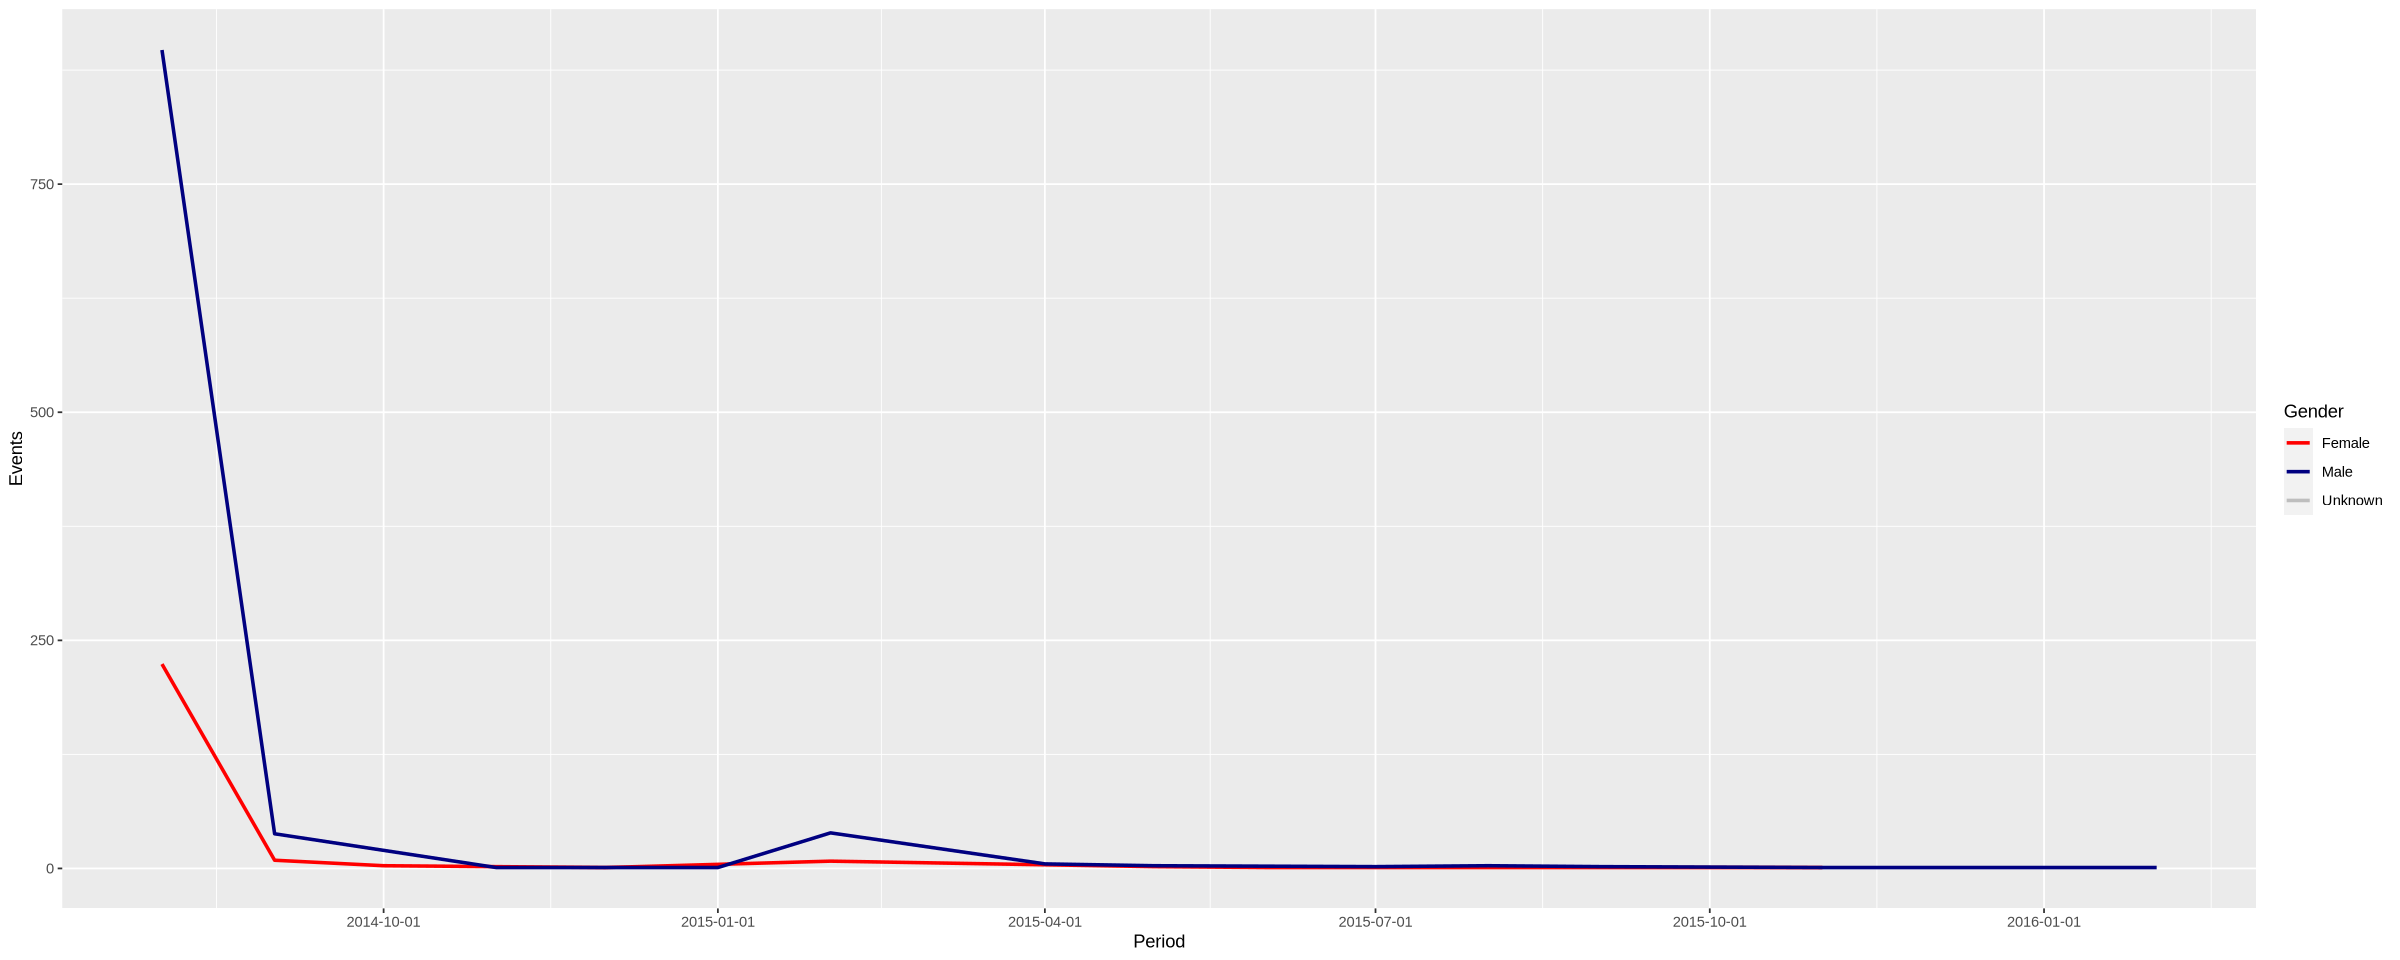

In [8]:
health.plot %>% 
    ggplot() + 
        geom_line(aes(x=Period, y=Events, group=Gender, col=Gender), lwd=1) + 
        scale_x_date(breaks = '3 months') + 
        scale_color_manual(values=c('red', 'navyblue', 'grey'))

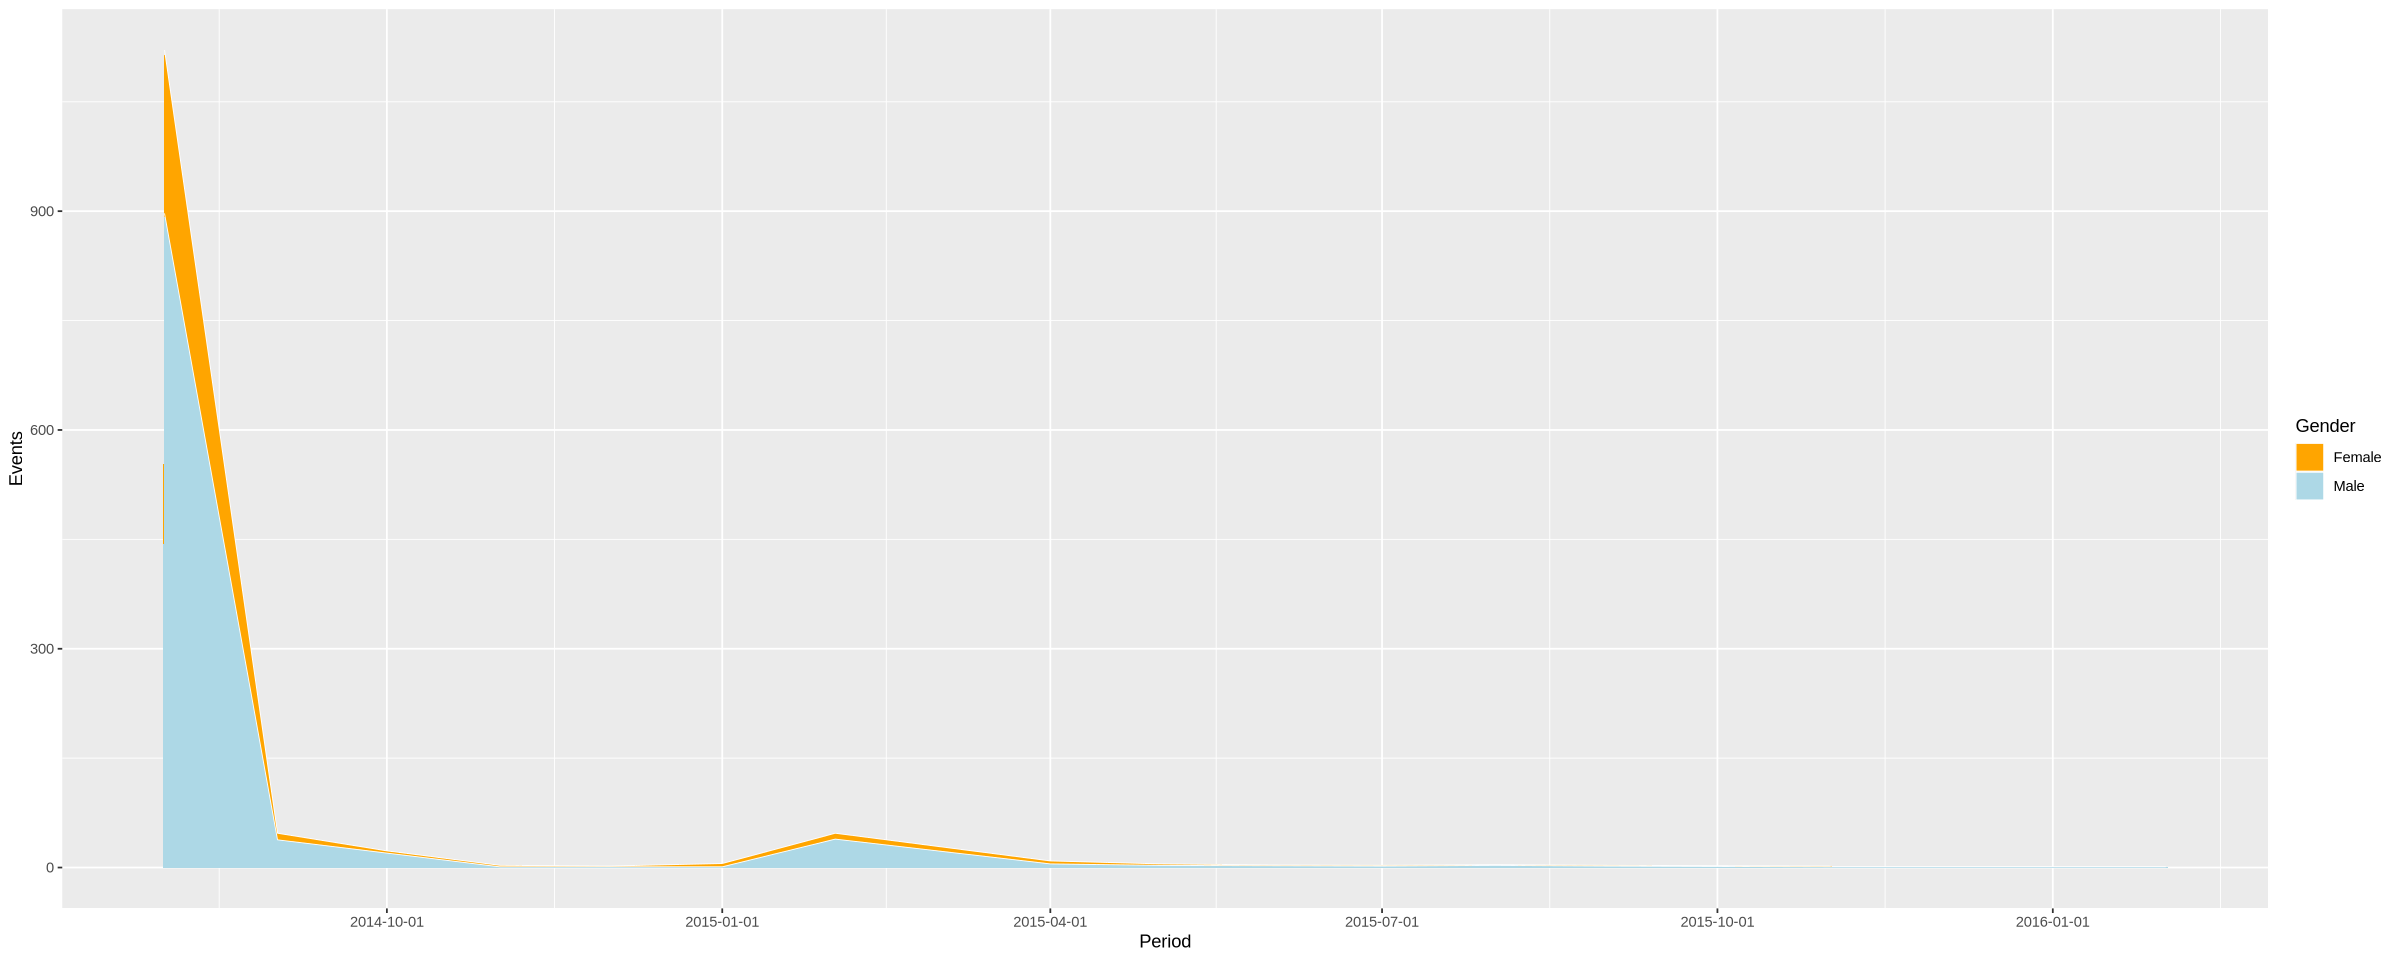

In [9]:
health.plot %>% 
    ggplot() + 
        geom_area(aes(x=Period, y=Events, group=Gender, fill=Gender), lwd=0.25, col='white') + 
        scale_x_date(breaks = '3 months') + 
        scale_fill_manual(values=c('orange', 'lightblue', 'grey'))